In [35]:
from __future__ import print_function
import matplotlib.pyplot as plt
import torch as th
import numpy as np
from torch.autograd import Variable
#Adam解释文章https://juejin.im/entry/5983115f6fb9a03c50227fd4
# Adam(adaptive moment estimation)自适应矩估计Adam 也是基于梯度下降的方法
#torch.optim是一个实现了各种优化算法的库
def train(x,y,w1,w2,b1,b2):
    #lr学习率
    optimizer=th.optim.Adam([w1,w2,b1,b2],lr=0.01)
    def closure():
        #对所有的参数的梯度缓冲区进行归零 
        optimizer.zero_grad()
        #expand返回tensor的一个新视图，单个维度扩大为更大的尺寸
        hid=th.tanh(x.mm(w1)+b1.expand(x.size()[0],b1.size()[1]))
        y_pred=hid.mm(w2)+b2.expand(x.size()[0],b2.size()[1])
        loss=(y_pred-y).pow(2).sum()
        loss.backward()
        return loss
    for t in range(10000):
            if t %1000==0:
                print(t,closure().data[0])
            optimizer.step(closure)
        
def forward(x,w1,w2,b1,b2):
    hid=th.tanh(x.mm(w1)+b1.expand(x.size()[0],b1.size()[1]))
    return hid.mm(w2)+b2.expand(x.size()[0],b2.size()[1])

def get_neu_output(x,num,w1,w2,b1,b2):
    hid=th.tanh(x.mm(w1)+b1.expand(x.size()[0],b1.size()[1]))
    return hid[:,num].unsqueeze(1).mm(w2[num,:].unsqueeze(0))

def get_variables(M):
    w1=Variable(th.randn(1,M).type(th.FloatTensor),requires_grad=True)
    w2=Variable(th.randn(M,1).type(th.FloatTensor),requires_grad=True)
    b1=Variable(th.zeros(1,M).type(th.FloatTensor),requires_grad=True)
    b2=Variable(th.zeros(1,1).type(th.FloatTensor),requires_grad=True)
    return w1,w2,b1,b2

def f1(x):
    return x*x
def f2(x):
    return np.sin(x)
def f3(x):
	return np.abs(x)
def f4(x):
    tmp=np.ones(50)
    return tmp*(x>0)
def to_torch_array(x):
    return Variable(th.from_numpy(x.reshape(x.shape+(1,))).type(th.FloatTensor),requires_grad=False)



In [36]:
y=th.FloatTensor([[1], [2], [3],[4], [5], [6]])
y1=th.FloatTensor([[1,10], [2,10], [3,10],[4,10], [5,10], [6,10]])
#一个空张量tensor可以通过规定其大小来构建：
th.IntTensor(2, 4).zero_()
x=th.Tensor([[1,2,3]])
print(y+y1)
print(y,x)
th.Size([3,3])
#x只能是单个维度
# x.expand(3,4)
#矩阵相乘
th.mm(y,x)
#y.mm(x)
#起始值-3，终止值3（不包含），步长1
# x=np.arange(-3,3,1)


  2  11
  4  12
  6  13
  8  14
 10  15
 12  16
[torch.FloatTensor of size 6x2]


 1
 2
 3
 4
 5
 6
[torch.FloatTensor of size 6x1]
 
 1  2  3
[torch.FloatTensor of size 1x3]




  1   2   3
  2   4   6
  3   6   9
  4   8  12
  5  10  15
  6  12  18
[torch.FloatTensor of size 6x3]

In [37]:
#生成训练数据 
x=np.arange(-3,3,6.0/50)
y1=to_torch_array(f1(x))
y2=to_torch_array(f2(x))
y3=to_torch_array(f3(x))
y4=to_torch_array(f4(4))

x=to_torch_array(x)

case1=get_variables(3)
case2=get_variables(3)
case3=get_variables(3)
case4=get_variables(3)


train(x,y1,*case1)
train(x,y2,*case2)
train(x,y3,*case3)
train(x,y4,*case4)


0 1037.5400390625
1000 36.195858001708984
2000 1.7391939163208008
3000 1.190649151802063
4000 0.8272851705551147
5000 0.5776839852333069
6000 0.406166672706604
7000 0.28921154141426086
8000 0.21125146746635437
9000 0.15835446119308472
0 81.31620788574219
1000 0.6916503310203552
2000 0.5222682356834412
3000 0.3809751868247986
4000 0.27295950055122375
5000 0.19250424206256866
6000 0.08786038309335709
7000 0.011851568706333637
8000 0.006126744206994772
9000 0.006804249249398708
0 164.0264892578125
1000 0.426332950592041
2000 0.38769686222076416
3000 0.3647238314151764
4000 0.3485216796398163
5000 0.3370647430419922
6000 0.3289770781993866
7000 0.32298392057418823
8000 0.3189156651496887
9000 0.3161885738372803
0 51.58633041381836
1000 1.313364705879394e-08
2000 0.0031974338926374912
3000 7.349413522206305e-09
4000 6.319851308944635e-09
5000 5.4889852663109195e-09
6000 1.3020734286328661e-06
7000 4.387757712720486e-09
8000 0.00030447947210632265
9000 1.4466770153376274e-05


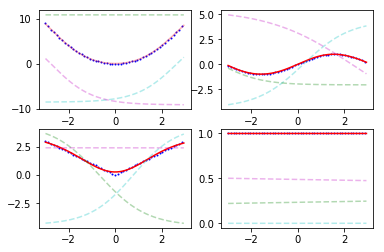

In [38]:
#预测
ix=np.arange(-3,3,4.0/100)
ix2d=to_torch_array(ix)
y1_pred=forward(ix2d,*case1)
y2_pred=forward(ix2d,*case2)
y3_pred=forward(ix2d,*case3)
y4_pred=forward(ix2d,*case4)


y1_neu=[get_neu_output(ix2d,i,*case1) for i in range(3)]
y2_neu=[get_neu_output(ix2d,i,*case2) for i in range(3)]
y3_neu=[get_neu_output(ix2d,i,*case3) for i in range(3)]
y4_neu=[get_neu_output(ix2d,i,*case4) for i in range(3)]


fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)



ax1.plot(x.data.numpy()[:, 0], y1.data.numpy()[:, 0], 'bo', ms=1)
ax1.plot(ix, y1_pred.data.numpy()[:, 0], 'r', alpha=0.3)
ax1.plot(ix, y1_neu[0].data.numpy()[:, 0], 'c--', alpha=0.3)
ax1.plot(ix, y1_neu[1].data.numpy()[:, 0], 'g--', alpha=0.3)
ax1.plot(ix, y1_neu[2].data.numpy()[:, 0], 'm--', alpha=0.3)

ax2.plot(x.data.numpy()[:, 0], y2.data.numpy()[:, 0], 'bo', ms=1)
ax2.plot(ix, y2_pred.data.numpy()[:, 0], 'r',)
ax2.plot(ix, y2_neu[0].data.numpy()[:, 0], 'c--', alpha=0.3)
ax2.plot(ix, y2_neu[1].data.numpy()[:, 0], 'g--', alpha=0.3)
ax2.plot(ix, y2_neu[2].data.numpy()[:, 0], 'm--', alpha=0.3)

ax3.plot(x.data.numpy()[:, 0], y3.data.numpy()[:, 0], 'bo', ms=1)
ax3.plot(ix, y3_pred.data.numpy()[:, 0], 'r',)
ax3.plot(ix, y3_neu[0].data.numpy()[:, 0], 'c--', alpha=0.3)
ax3.plot(ix, y3_neu[1].data.numpy()[:, 0], 'g--', alpha=0.3)
ax3.plot(ix, y3_neu[2].data.numpy()[:, 0], 'm--', alpha=0.3)

ax4.plot(x.data.numpy()[:, 0], y4.data.numpy()[:, 0], 'bo', ms=1)
ax4.plot(ix, y4_pred.data.numpy()[:, 0], 'r',)
ax4.plot(ix, y4_neu[0].data.numpy()[:, 0], 'c--', alpha=0.3)
ax4.plot(ix, y4_neu[1].data.numpy()[:, 0], 'g--', alpha=0.3)
ax4.plot(ix, y4_neu[2].data.numpy()[:, 0], 'm--', alpha=0.3)

# ax1.annotate('M=1', xy=(80, 80), xycoords='figure points')
# ax2.annotate('M=3', xy=(80, 80), xycoords='figure points')
# ax3.annotate('M=10', xy=(80, 80), xycoords='figure points')

plt.show()
